##Lights, Camera, Statistics! IMDb Movie Ratings and the Secret Recipe for ##Success


Dive deep into the world of IMDb movie ratings to unravel the mysteries behind movie genres, box office
triumphs, and other factors that can make or break a film's success.

In [ ]:
#Step 1: (import data)
%cd /content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!

/content/drive/MyDrive/Statistics with Python/Inferential Statistics/Capstone Project - Lights, Camera, Statistics!


In [ ]:
# Step 2: (import neccesary libraries)
#Libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
# Step 3: read the data
data = pd.read_csv("imdb.csv")


In [ ]:
#Step 4: Define, based on the requirements which data out of the data available will be used
# Based on the pdf that describe the instruction, there are couple of variables to work with: movie ratings,  decades.
 # critic acclaim, Runtime and box office success, genres,IMDb, budgets, revenues,  genres, countries, and time periods.

 #let's create a list with these data just to work with a more reduce and control amount of data
df = data[["IMDB_Rating", "Runtime", "Released_Year", "Series_Title", "Meta_score", "Director", "Gross"]]
df.head()

,IMDB_Rating,Runtime,Released_Year,Series_Title,Meta_score,Director,Gross
0,9.3,142 min,1994,The Shawshank Redemption,80.0,Frank Darabont,"28,341,469"
1,9.2,175 min,1972,The Godfather,100.0,Francis Ford Coppola,"134,966,411"
2,9.0,152 min,2008,The Dark Knight,84.0,Christopher Nolan,"534,858,444"
3,9.0,202 min,1974,The Godfather: Part II,90.0,Francis Ford Coppola,"57,300,000"
4,9.0,96 min,1957,12 Angry Men,96.0,Sidney Lumet,"4,360,000"


# Data cleanning process

In [ ]:
#step 5: check the data in detail to make sure the data type make sense to work with it
df.info()

# in this case Runtime should be an int (number), release year should be an date or an int (number), and gross should be an int (number).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IMDB_Rating    1000 non-null   float64
 1   Runtime        1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Series_Title   1000 non-null   object 
 4   Meta_score     843 non-null    float64
 5   Director       1000 non-null   object 
 6   Gross          831 non-null    object 
dtypes: float64(2), object(5)
memory usage: 54.8+ KB


In [ ]:
# Step 6: tackle each of the variable to fix the data type

df["Runtime"] = data['Runtime'].str.replace(' min', '', regex=False).astype(int)

with pd.option_context('display.max_rows', None):
    print(df["Runtime"])


0      142
1      175
2      152
3      202
4       96
5      201
6      154
7      195
8      148
9      139
10     178
11     142
12     161
13     179
14     136
15     146
16     124
17     133
18     160
19     132
20     153
21     169
22     130
23     125
24     169
25     189
26     116
27     127
28     118
29     121
30     133
31     207
32     130
33     122
34     106
35     112
36     130
37     151
38     150
39     155
40     119
41     106
42     110
43      88
44     137
45     155
46      89
47     116
48     165
49     109
50     102
51      87
52      87
53     126
54     125
55     147
56     106
57     161
58     117
59     181
60     149
61     105
62     165
63     164
64     170
65     165
66      98
67     137
68     101
69     113
70     134
71     229
72     115
73     146
74     147
75     117
76     122
77     143
78      95
79     116
80      88
81     112
82     110
83     125
84     119
85     104
86     139
87     160
88     115
89     123
90     131

<ipython-input-43-6a2a3b8cf81a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Runtime"] = data['Runtime'].str.replace(' min', '', regex=False).astype(int)


In [ ]:
# step 6.1: tackle each of the variable to fix the data type

df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
#with pd.option_context('display.max_rows', None):
    #print(df["Released_Year"])

#In this step I replace a non numeric value with a NaN (the value is missing) and then print all the row to see if it was done
# then I need to create a decade number because that is what the data is asking for (for example 2001.0 should be 2000 because the decade started at 2000)

df = df.dropna(subset=['Released_Year'])
df['Decade'] = (np.floor(df['Released_Year'] / 10) * 10).astype(int)
print(df["Decade"])

0      1990
1      1970
2      2000
3      1970
4      1950
       ... 
995    1960
996    1950
997    1950
998    1940
999    1930
Name: Decade, Length: 999, dtype: int64


<ipython-input-44-48aa15635ac0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
<ipython-input-44-48aa15635ac0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = (np.floor(df['Released_Year'] / 10) * 10).astype(int)


In [ ]:
# step 6.2: tackle each of the variable to fix the data type

#Convert and transform gross variable

df['Gross'] = df['Gross'].str.replace(',','').fillna(0).astype(int)
print(df['Gross'])

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995            0
996            0
997     30500000
998            0
999            0
Name: Gross, Length: 999, dtype: int64


In [ ]:
# here I transform the gross data to make it more readable
df['Gross_thousands'] = df['Gross'] / 1000000
print(df['Gross_thousands'])

0       28.341469
1      134.966411
2      534.858444
3       57.300000
4        4.360000
          ...    
995      0.000000
996      0.000000
997     30.500000
998      0.000000
999      0.000000
Name: Gross_thousands, Length: 999, dtype: float64


In [ ]:
#checking the data type updated
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IMDB_Rating      999 non-null    float64
 1   Runtime          999 non-null    int64  
 2   Released_Year    999 non-null    float64
 3   Series_Title     999 non-null    object 
 4   Meta_score       842 non-null    float64
 5   Director         999 non-null    object 
 6   Gross            999 non-null    int64  
 7   Decade           999 non-null    int64  
 8   Gross_thousands  999 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 78.0+ KB


In [ ]:
#Step 7 is to remove the columns or data that is not longer needed such as release_year and gross

df.drop(columns=['Released_Year', 'Gross'], inplace=True)
df.head()


,IMDB_Rating,Runtime,Series_Title,Meta_score,Director,Decade,Gross_thousands
0,9.3,142,The Shawshank Redemption,80.0,Frank Darabont,1990,28.341469
1,9.2,175,The Godfather,100.0,Francis Ford Coppola,1970,134.966411
2,9.0,152,The Dark Knight,84.0,Christopher Nolan,2000,534.858444
3,9.0,202,The Godfather: Part II,90.0,Francis Ford Coppola,1970,57.300000
4,9.0,96,12 Angry Men,96.0,Sidney Lumet,1950,4.360000


In [ ]:
#Exploratory data

# Summary Statistics
df.describe()

,IMDB_Rating,Runtime,Meta_score,Decade,Gross_thousands
count,999.000000,999.000000,842.000000,999.000000,999.000000
mean,7.949650,122.873874,77.972684,1986.586587,56.419460
std,0.275407,28.102520,12.383410,23.189130,103.223061
min,7.600000,45.000000,28.000000,1920.000000,0.000000
25%,7.700000,103.000000,70.000000,1970.000000,0.442229
50%,7.900000,119.000000,79.000000,1990.000000,10.680275
75%,8.100000,137.000000,87.000000,2000.000000,61.390045
max,9.300000,321.000000,100.000000,2020.000000,936.662225


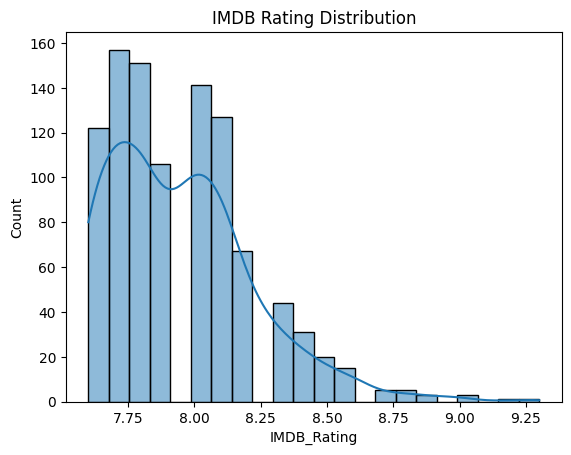

In [ ]:
# Histogram of the IMDB ratings
sns.histplot(df['IMDB_Rating'], kde = True)
plt.title('IMDB Rating Distribution')
plt.show()

In [ ]:
# Study the top 10 directors with the highest avg IMDB rating
director_ratings = (df.groupby('Director')['IMDB_Rating']
                    .mean()
                    .sort_values(ascending = False).
                    head(10))
director_ratings

,IMDB_Rating
Director,
Frank Darabont,8.95
Irvin Kershner,8.70
Lana Wachowski,8.70
George Lucas,8.60
Roberto Benigni,8.60
Masaki Kobayashi,8.60
Thomas Kail,8.60
Sudha Kongara,8.60
Fernando Meirelles,8.60


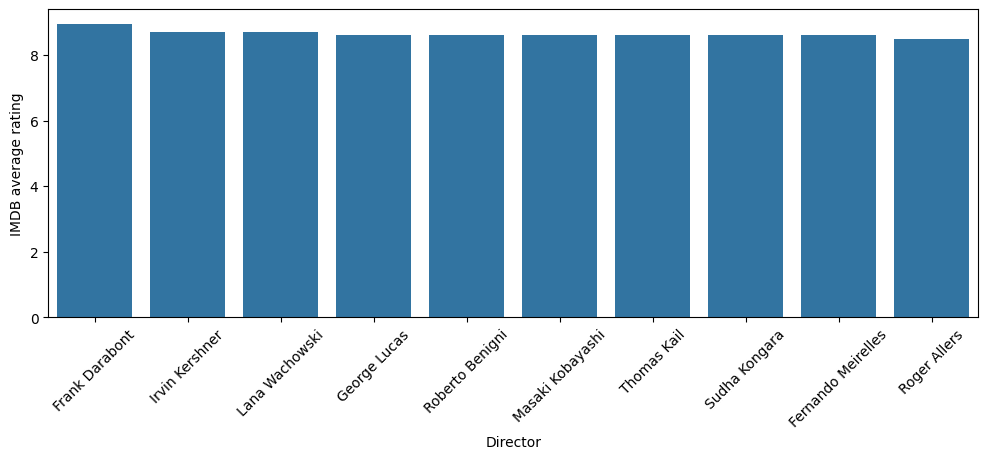

In [ ]:
# Visualize the Mean IMDB ratings for the top 10 directors
plt.figure(figsize = (12, 4))
sns.barplot(x = director_ratings.index,
            y = director_ratings.values)
plt.xticks(rotation = 45)
plt.xlabel('Director')
plt.ylabel('IMDB average rating')
plt.show()

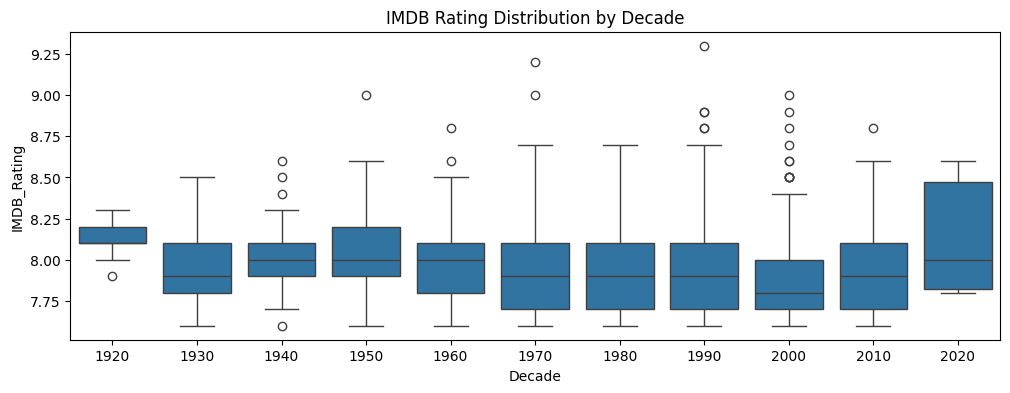

In [ ]:
# Distribution of IMDB ratings by decade
plt.figure(figsize = (12, 4))
sns.boxplot(x = 'Decade',
            y = 'IMDB_Rating',
            data = df)
plt.title('IMDB Rating Distribution by Decade')
plt.show()

In [ ]:
# Covariance matrix
df_co = df[['Runtime', 'IMDB_Rating', 'Gross_thousands', 'Meta_score']]
df_co.cov()

,Runtime,IMDB_Rating,Gross_thousands,Meta_score
Runtime,789.751611,1.889335,415.844271,-10.518426
IMDB_Rating,1.889335,0.075849,2.386467,0.943683
Gross_thousands,415.844271,2.386467,10655.000271,-72.638743
Meta_score,-10.518426,0.943683,-72.638743,153.348837


In [ ]:
print(df.columns)


Index(['IMDB_Rating', 'Runtime', 'Series_Title', 'Meta_score', 'Director',
       'Decade', 'Gross_thousands'],
      dtype='object')


In [ ]:
# Covariance matrix
df_co = df[['Runtime', 'IMDB_Rating', 'Gross_thousands', 'Meta_score']]
df_co.cov()

,Runtime,IMDB_Rating,Gross_thousands,Meta_score
Runtime,789.751611,1.889335,415.844271,-10.518426
IMDB_Rating,1.889335,0.075849,2.386467,0.943683
Gross_thousands,415.844271,2.386467,10655.000271,-72.638743
Meta_score,-10.518426,0.943683,-72.638743,153.348837


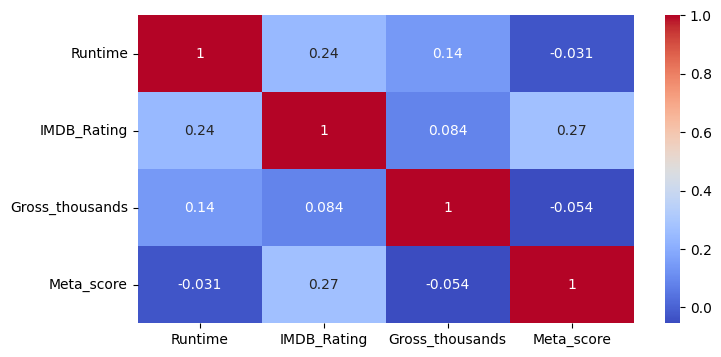

In [ ]:
# Correlation Heatmap
plt.figure(figsize = (8,4))
sns.heatmap(df_co.corr(),
            annot = True,
            cmap = 'coolwarm')
plt.show()

In [ ]:
#Calculate the Mean, Std, sample size
print(df.groupby('Decade').agg({'Gross_thousands':['mean', 'std', 'count']}))
Decade_summary = df.groupby('Decade').agg({'Gross_thousands':['mean', 'std', 'count']})

       Gross_thousands                  
                  mean         std count
Decade                                  
1920          1.341802    2.084388    11
1930          9.968549   40.300467    24
1940          4.739121   13.376285    35
1950          7.846706   17.703398    56
1960         21.234302   35.304236    73
1970         41.051211   61.715373    76
1980         56.013362   78.126921    89
1990         57.147999   92.390192   150
2000         63.191930  102.460660   237
2010         92.148255  146.224140   242
2020          0.000000    0.000000     6


In [ ]:
# rename columns
Decade_summary.columns = ['Gross_mean', 'Gross_std', 'Gross_count']

In [ ]:
#calculate the standar error under the sample mean (SEM)

Decade_summary['Gross_se'] = Decade_summary['Gross_std'] / np.sqrt(Decade_summary['Gross_count'])
Decade_summary.head()

,Gross_mean,Gross_std,Gross_count,Gross_se
Decade,,,,
1920,1.341802,2.084388,11,0.628467
1930,9.968549,40.300467,24,8.226298
1940,4.739121,13.376285,35,2.261005
1950,7.846706,17.703398,56,2.365716
1960,21.234302,35.304236,73,4.132048


In [ ]:


# Calculate the confidence interval with 95% CL
summary = df.groupby('Decade')['Gross_thousands'].agg(['mean', 'count', 'std']).reset_index()

# Now, you can calculate the t-score for the confidence interval
alpha = 0.05
summary['tscore'] = st.t.ppf(1 - alpha/2, summary['count'] - 1)

# Calculate the margin of error
summary['margin_of_error'] = summary['tscore'] * (summary['std'] / summary['count']**0.5)

# Calculate the confidence intervals
summary['conf_interval_lower'] = summary['mean'] - summary['margin_of_error']
summary['conf_interval_upper'] = summary['mean'] + summary['margin_of_error']

print(summary)

    Decade       mean  count         std    tscore  margin_of_error  \
0     1920   1.341802     11    2.084388  2.228139         1.400311   
1     1930   9.968549     24   40.300467  2.068658        17.017395   
2     1940   4.739121     35   13.376285  2.032245         4.594915   
3     1950   7.846706     56   17.703398  2.004045         4.741001   
4     1960  21.234302     73   35.304236  1.993464         8.237088   
5     1970  41.051211     76   61.715373  1.992102        14.102567   
6     1980  56.013362     89   78.126921  1.987290        16.457616   
7     1990  57.147999    150   92.390192  1.976013        14.906307   
8     2000  63.191930    237  102.460660  1.970067        13.111849   
9     2010  92.148255    242  146.224140  1.969856        18.515947   
10    2020   0.000000      6    0.000000  2.570582         0.000000   

    conf_interval_lower  conf_interval_upper  
0             -0.058509             2.742113  
1             -7.048845            26.985944  
2     

#Conclusions



1) The average movie duration for highly rated movies is 123 min

2) Frank Darabont makes the highest rated movies

3) 2020 has the most outliers when it comes to highly rated movies (in a positive way)

4) Runtime has a positive relationship with the IMDB rating but no relationship with meta score

5) Either people prefer recent movies or recent movies have higher quality

6) In the decade of 2020, a highly rated movie is expected to earn above 100M